<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center">Deep Learning Fundamentals</h2>
    <h2 align="center" style="color:#01ff84">Binary Clasification: Exercise</h2>
<div>

### Imports

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles, make_moons, make_blobs, make_classification, make_gaussian_quantiles

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

### Aux functions

In [2]:
def plot_points(x, y, ax):
    y = y.reshape(y.shape[0],1)
    ax.scatter(x[y[:, 0] == 0, 0], x[y[:, 0] == 0, 1], c="skyblue")
    ax.scatter(x[y[:, 0] == 1, 0], x[y[:, 0] == 1, 1], c="salmon")
    #ax.set_xlabel('X1')
    #ax.set_ylabel('X2')
    ax.axis("equal")
    #plt.legend()
    #plt.show()
    
def plot_surface(model, minimum, maximun, resolution, ax):
    
    # GENERATE GRID X DATA
    x1_indexes = np.linspace(minimum, maximun, resolution)
    x2_indexes = np.linspace(minimum, maximun, resolution)
    x1, x2 = np.meshgrid(x1_indexes, x2_indexes)
    x_grid = np.hstack(( x1.reshape(resolution*resolution,-1), x2.reshape(resolution*resolution,-1) ))
    
    # FOWARD MODEL
    pred = model.predict(x_grid).reshape(resolution, resolution)
    
    # SUBPLOTS
    ax.pcolormesh(x1, x2, pred, vmin=0, vmax=1, cmap="coolwarm", shading='auto')

def plot_loss(ax):
    ax.plot(train_hist.history["loss"])
    ax.set_title("Loss: Binary Cross Entropy")
    ax.set_xlabel('Epoch')

def plot_accuracy(ax):
    ax.plot(train_hist.history["accuracy"])
    ax.set_title("Accuracy")
    ax.set_xlabel('Epoch')

<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 1 (solved): Blobs</h3>
  <p>Train a MLP</p>
<div>

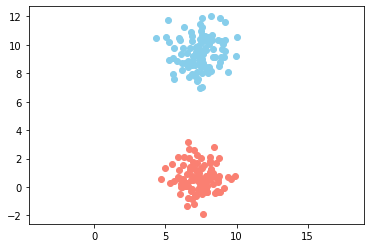

In [3]:
x, y = make_blobs(n_samples=200, random_state=8, n_features=2, centers=2)
plot_points(x,y, ax=plt)

In [4]:
x.mean(axis=0), x.std(axis=0) 

(array([7.35780043, 5.04602842]), array([1.05621926, 4.51857786]))

In [5]:
# Standard scale
x = (x - x.mean(axis=0)) / x.std(axis=0)

In [6]:
inp = keras.Input(shape=(2,), name="INPUT")
out = layers.Dense(1, activation='sigmoid', kernel_initializer="he_uniform", bias_initializer="zeros", name='OUTPUT')(inp)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss      = 'binary_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate=0.1),
              metrics   = ['accuracy'])

train_hist = model.fit(x, y,
                       epochs=100,
                       batch_size=64,
                       verbose=0)

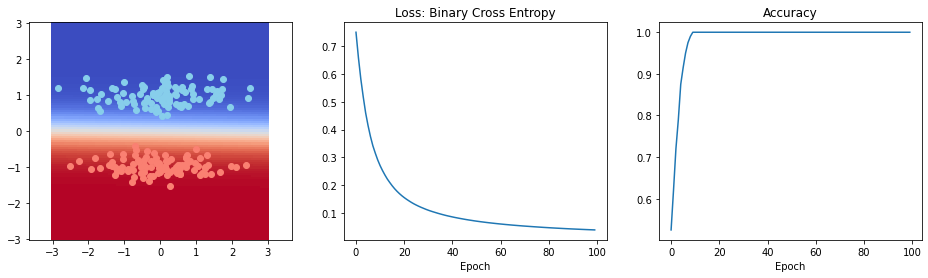

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

plot_surface(model=model, minimum=-3, maximun=3, resolution=100, ax=ax[0])
plot_points(x, y, ax=ax[0])
plot_loss(ax=ax[1])
plot_accuracy(ax=ax[2])

<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 2: Circles</h3>
  <p>Train a MLP</p>
<div>

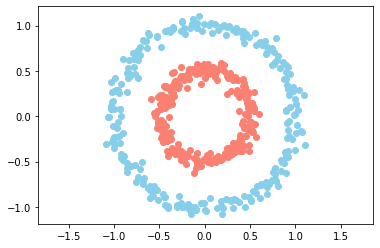

In [9]:
x, y = make_circles(n_samples=500, factor=0.5, noise=0.05)
plot_points(x,y, ax=plt)

In [10]:
x.mean(axis=0), x.std(axis=0) 
x = (x - x.mean(axis=0)) / x.std(axis=0)

In [14]:
inp = keras.Input(shape=(2,), name="INPUT")
mid1 = layers.Dense(10, activation="relu", name='mid1')(inp)
mid2 = layers.Dense(10, activation="relu", name='mid2')(mid1)
out = layers.Dense(1, activation='sigmoid', kernel_initializer="he_uniform", bias_initializer="zeros", name='OUTPUT')(mid2)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss      = 'binary_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate=0.1),
              metrics   = ['accuracy'])

train_hist = model.fit(x, y,
                       epochs=100,
                       batch_size=64,
                       verbose=0)

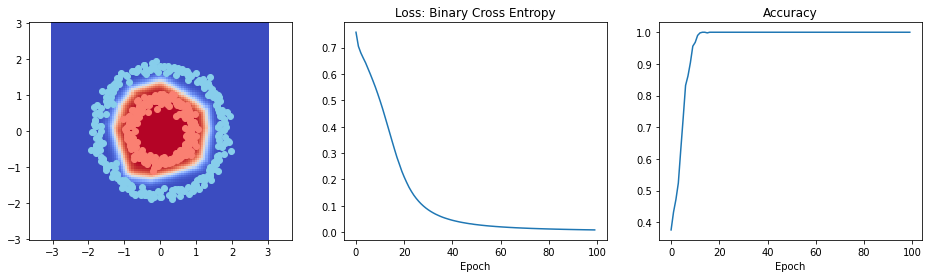

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

plot_surface(model=model, minimum=-3, maximun=3, resolution=100, ax=ax[0])
plot_points(x, y, ax=ax[0])
plot_loss(ax=ax[1])
plot_accuracy(ax=ax[2])

<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 3: Gaussian quantiles</h3>
  <p>Train a MLP</p>
<div>

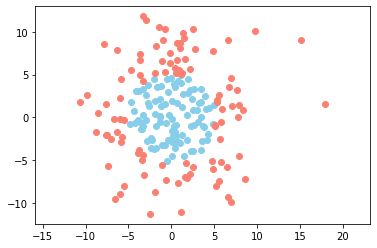

In [17]:
x, y = make_gaussian_quantiles(n_samples=200, n_features=2, n_classes=2, cov=20.0)
plot_points(x, y, ax=plt)

In [18]:
x.mean(axis=0), x.std(axis=0) 
x = (x - x.mean(axis=0)) / x.std(axis=0)

In [23]:
inp = keras.Input(shape=(2,), name="INPUT")
mid1 = layers.Dense(10, activation="relu", name='mid1')(inp)
mid2 = layers.Dense(15, activation="relu", name='mid2')(mid1)
out = layers.Dense(1, activation='sigmoid', kernel_initializer="he_uniform", bias_initializer="zeros", name='OUTPUT')(mid2)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss      = 'binary_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate=0.1),
              metrics   = ['accuracy'])

train_hist = model.fit(x, y,
                       epochs=100,
                       batch_size=64,
                       verbose=0)

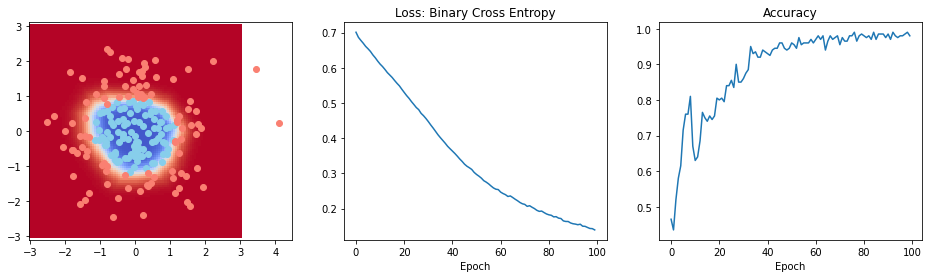

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

plot_surface(model=model, minimum=-3, maximun=3, resolution=100, ax=ax[0])
plot_points(x, y, ax=ax[0])
plot_loss(ax=ax[1])
plot_accuracy(ax=ax[2])

<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 4: Moons</h3>
  <p>Train a MLP</p>
<div>

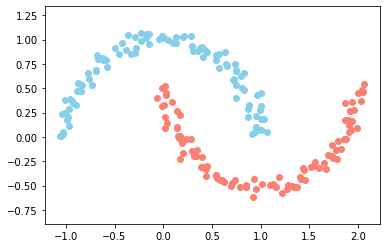

In [25]:
x, y = noisy_moons = make_moons(n_samples=200, noise=.05)
plot_points(x,y,ax=plt)

In [26]:
x.mean(axis=0), x.std(axis=0) 
x = (x - x.mean(axis=0)) / x.std(axis=0)

In [35]:
inp = keras.Input(shape=(2,), name="INPUT")
mid1 = layers.Dense(10, activation="relu", name='mid1')(inp)
mid2 = layers.Dense(15, activation="relu", name='mid2')(mid1)
mid3 = layers.Dense(15, activation="relu", name='mid3')(mid2)
out = layers.Dense(1, activation='sigmoid', kernel_initializer="he_uniform", bias_initializer="zeros", name='OUTPUT')(mid2)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss      = 'binary_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate=0.1),
              metrics   = ['accuracy'])

train_hist = model.fit(x, y,
                       epochs=100,
                       batch_size=14,
                       verbose=0)

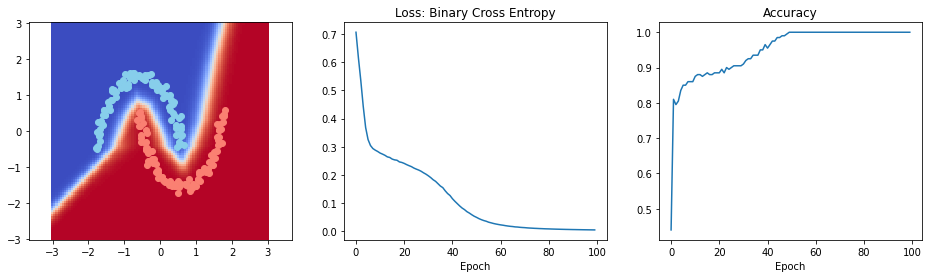

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

plot_surface(model=model, minimum=-3, maximun=3, resolution=100, ax=ax[0])
plot_points(x, y, ax=ax[0])
plot_loss(ax=ax[1])
plot_accuracy(ax=ax[2])

<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 5: Spiral</h3>
  <p>Train a MLP</p>
  https://ai.stackexchange.com/questions/1987/how-to-classify-data-which-is-spiral-in-shape
<div>

In [37]:
def spiral(N = 400):

    theta = np.sqrt(np.random.rand(N))*2*np.pi # np.linspace(0,2*pi,100)

    r_a = 2*theta + np.pi
    data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
    x_a = data_a + np.random.randn(N,2)

    r_b = -2*theta - np.pi
    data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
    x_b = data_b + np.random.randn(N,2)

    res_a = np.append(x_a, np.zeros((N,1)), axis=1)
    res_b = np.append(x_b, np.ones((N,1)), axis=1)

    res = np.append(res_a, res_b, axis=0)
    np.random.shuffle(res)
    
    x = np.vstack((x_a, x_b))
    y = np.vstack(( np.zeros((N,1)),
                    np.ones((N,1)) ))
    
    return x, y

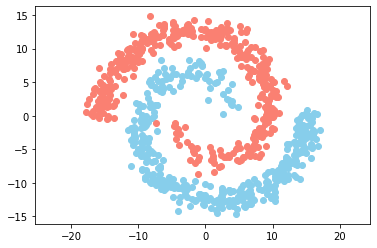

In [38]:
x, y = spiral(400)
plot_points(x, y, ax=plt)

In [39]:
x.mean(axis=0), x.std(axis=0) 
x = (x - x.mean(axis=0)) / x.std(axis=0)

In [40]:
inp = keras.Input(shape=(2,), name="INPUT")
mid1 = layers.Dense(10, activation="relu", name='mid1')(inp)
mid2 = layers.Dense(15, activation="relu", name='mid2')(mid1)
mid3 = layers.Dense(15, activation="relu", name='mid3')(mid2)
out = layers.Dense(1, activation='sigmoid', kernel_initializer="he_uniform", bias_initializer="zeros", name='OUTPUT')(mid2)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss      = 'binary_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate=0.1),
              metrics   = ['accuracy'])

train_hist = model.fit(x, y,
                       epochs=100,
                       batch_size=14,
                       verbose=0)

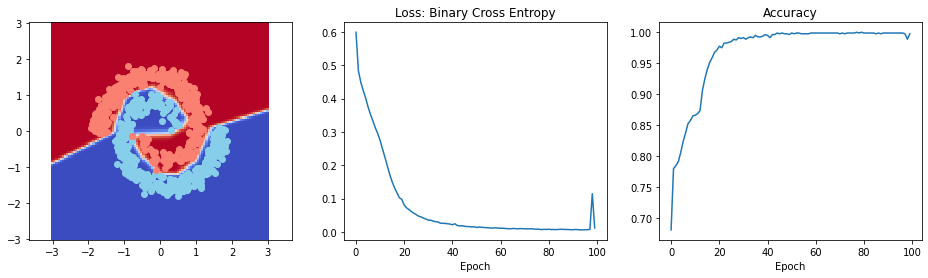

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

plot_surface(model=model, minimum=-3, maximun=3, resolution=100, ax=ax[0])
plot_points(x, y, ax=ax[0])
plot_loss(ax=ax[1])
plot_accuracy(ax=ax[2])

<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 6: XOR unifrom</h3>
  <p>Train a MLP</p>
<div>

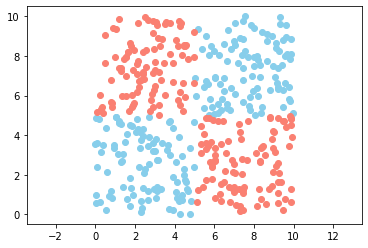

In [43]:
def xor_uniform_data(points:int, low, high):
    
    center = (high+low)/2    
    cluster_points = points // 4
    
    x1 = np.vstack(( np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)),
                     np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)) ))

    x2 = np.vstack(( np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)) ))

    x = np.hstack((x1,x2))

    y = np.vstack(( np.zeros((cluster_points,1)),
                    np.ones((cluster_points,1)),
                    np.ones((cluster_points,1)),
                    np.zeros((cluster_points,1)) ))
    
    return x,y

x,y = xor_uniform_data(points=400, low=0, high=10)
plot_points(x,y,ax=plt)

In [44]:
x.mean(axis=0), x.std(axis=0) 
x = (x - x.mean(axis=0)) / x.std(axis=0)

In [45]:
inp = keras.Input(shape=(2,), name="INPUT")
mid1 = layers.Dense(10, activation="relu", name='mid1')(inp)
mid2 = layers.Dense(15, activation="relu", name='mid2')(mid1)
mid3 = layers.Dense(15, activation="relu", name='mid3')(mid2)
out = layers.Dense(1, activation='sigmoid', kernel_initializer="he_uniform", bias_initializer="zeros", name='OUTPUT')(mid2)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss      = 'binary_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate=0.1),
              metrics   = ['accuracy'])

train_hist = model.fit(x, y,
                       epochs=100,
                       batch_size=14,
                       verbose=0)

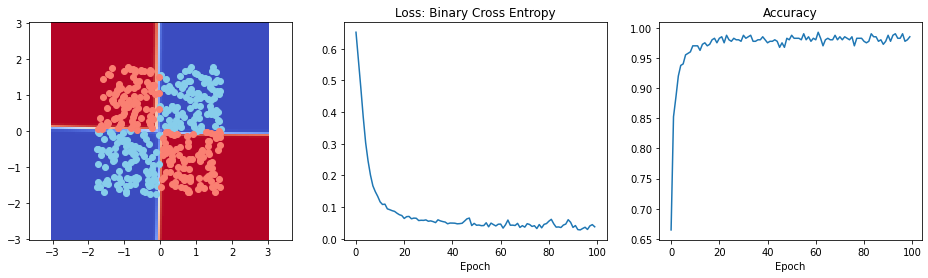

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

plot_surface(model=model, minimum=-3, maximun=3, resolution=100, ax=ax[0])
plot_points(x, y, ax=ax[0])
plot_loss(ax=ax[1])
plot_accuracy(ax=ax[2])

<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 7: XOR normal</h3>
  <p>Train a MLP</p>
<div>

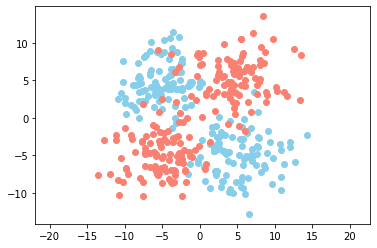

In [47]:
def xor_normal_data(points:int, center, dist, std):
    
    cluster_points = points // 4
    
    x1 = np.vstack(( np.random.normal(loc=center-dist, scale=std,  size=(cluster_points,1)),
                     np.random.normal(loc=center+dist, scale=std, size=(cluster_points,1)),
                     np.random.normal(loc=center-dist, scale=std,  size=(cluster_points,1)),
                     np.random.normal(loc=center+dist, scale=std, size=(cluster_points,1)) ))

    x2 = np.vstack(( np.random.normal(loc=center+dist, scale=std,  size=(cluster_points,1)),
                     np.random.normal(loc=center+dist, scale=std,  size=(cluster_points,1)),
                     np.random.normal(loc=center-dist, scale=std, size=(cluster_points,1)),
                     np.random.normal(loc=center-dist, scale=std, size=(cluster_points,1)) ))

    x = np.hstack((x1,x2))

    y = np.vstack(( np.zeros((cluster_points,1)),
                    np.ones((cluster_points,1)),
                    np.ones((cluster_points,1)),
                    np.zeros((cluster_points,1)) ))
    
    return x,y

x,y = xor_normal_data(points=400, center=0, dist=5, std=3)
plot_points(x,y,ax=plt)

In [48]:
x.mean(axis=0), x.std(axis=0) 
x = (x - x.mean(axis=0)) / x.std(axis=0)

In [49]:
inp = keras.Input(shape=(2,), name="INPUT")
mid1 = layers.Dense(10, activation="relu", name='mid1')(inp)
mid2 = layers.Dense(15, activation="relu", name='mid2')(mid1)
mid3 = layers.Dense(15, activation="relu", name='mid3')(mid2)
out = layers.Dense(1, activation='sigmoid', kernel_initializer="he_uniform", bias_initializer="zeros", name='OUTPUT')(mid2)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss      = 'binary_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate=0.1),
              metrics   = ['accuracy'])

train_hist = model.fit(x, y,
                       epochs=100,
                       batch_size=14,
                       verbose=0)

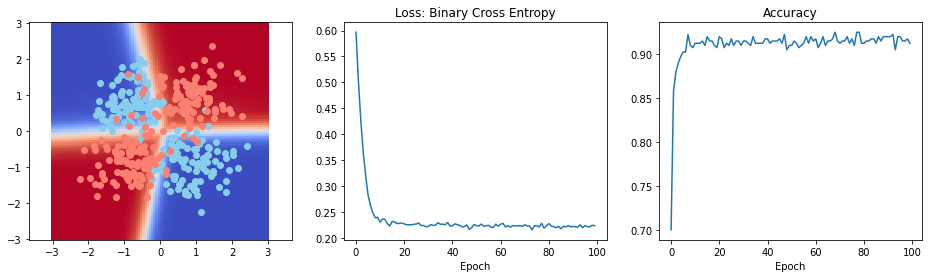

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

plot_surface(model=model, minimum=-3, maximun=3, resolution=100, ax=ax[0])
plot_points(x, y, ax=ax[0])
plot_loss(ax=ax[1])
plot_accuracy(ax=ax[2])

<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 8: Unbalanced easy</h3>
  <p>Train a MLP</p>
<div>

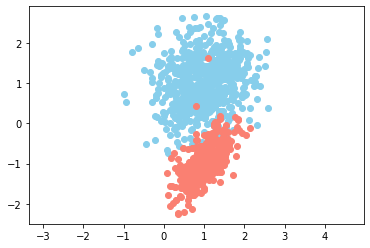

In [51]:
x, y = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.66],
    random_state=3
)
plot_points(x, y, ax=plt)

In [52]:
x.mean(axis=0), x.std(axis=0) 
x = (x - x.mean(axis=0)) / x.std(axis=0)

In [53]:
inp = keras.Input(shape=(2,), name="INPUT")
mid1 = layers.Dense(10, activation="relu", name='mid1')(inp)
mid2 = layers.Dense(15, activation="relu", name='mid2')(mid1)
mid3 = layers.Dense(15, activation="relu", name='mid3')(mid2)
out = layers.Dense(1, activation='sigmoid', kernel_initializer="he_uniform", bias_initializer="zeros", name='OUTPUT')(mid2)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss      = 'binary_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate=0.1),
              metrics   = ['accuracy'])

train_hist = model.fit(x, y,
                       epochs=100,
                       batch_size=14,
                       verbose=0)

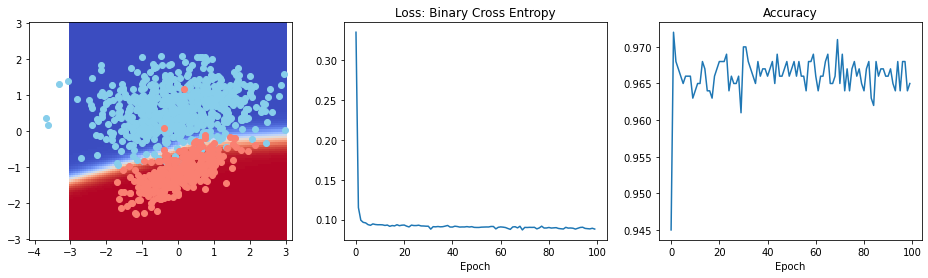

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

plot_surface(model=model, minimum=-3, maximun=3, resolution=100, ax=ax[0])
plot_points(x, y, ax=ax[0])
plot_loss(ax=ax[1])
plot_accuracy(ax=ax[2])

<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 9: Unbalanced medium (optional)</h3>
  <p>Train a MLP</p>
<div>

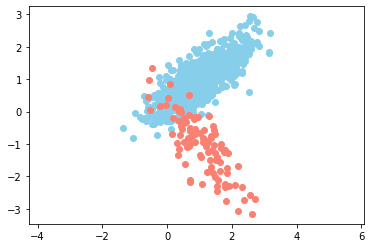

In [56]:
x, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.90],
                           flip_y=0,
                           random_state=1)
plot_points(x, y, ax=plt)

In [57]:
x.mean(axis=0), x.std(axis=0) 
x = (x - x.mean(axis=0)) / x.std(axis=0)

In [58]:
inp = keras.Input(shape=(2,), name="INPUT")
mid1 = layers.Dense(10, activation="relu", name='mid1')(inp)
mid2 = layers.Dense(15, activation="relu", name='mid2')(mid1)
mid3 = layers.Dense(15, activation="relu", name='mid3')(mid2)
out = layers.Dense(1, activation='sigmoid', kernel_initializer="he_uniform", bias_initializer="zeros", name='OUTPUT')(mid2)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss      = 'binary_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate=0.1),
              metrics   = ['accuracy'])

train_hist = model.fit(x, y,
                       epochs=100,
                       batch_size=14,
                       verbose=0)

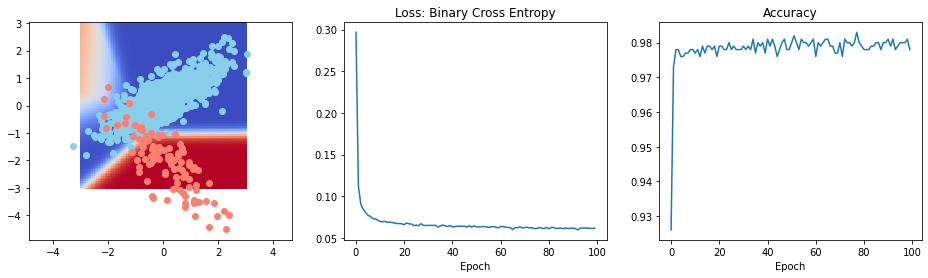

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

plot_surface(model=model, minimum=-3, maximun=3, resolution=100, ax=ax[0])
plot_points(x, y, ax=ax[0])
plot_loss(ax=ax[1])
plot_accuracy(ax=ax[2])

<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 10: Unbalanced super hard (optional)</h3>
  <p>Train a MLP</p>
<div>

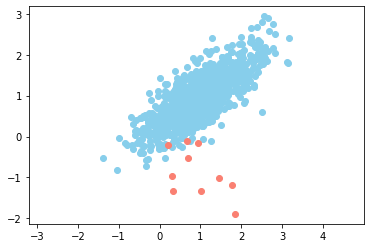

In [60]:
x, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           flip_y=0,
                           random_state=1)
plot_points(x, y, ax=plt)

In [61]:
x.mean(axis=0), x.std(axis=0) 
x = (x - x.mean(axis=0)) / x.std(axis=0)

In [62]:
inp = keras.Input(shape=(2,), name="INPUT")
mid1 = layers.Dense(10, activation="relu", name='mid1')(inp)
mid2 = layers.Dense(15, activation="relu", name='mid2')(mid1)
mid3 = layers.Dense(15, activation="relu", name='mid3')(mid2)
out = layers.Dense(1, activation='sigmoid', kernel_initializer="he_uniform", bias_initializer="zeros", name='OUTPUT')(mid2)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss      = 'binary_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate=0.1),
              metrics   = ['accuracy'])

train_hist = model.fit(x, y,
                       epochs=100,
                       batch_size=14,
                       verbose=0)

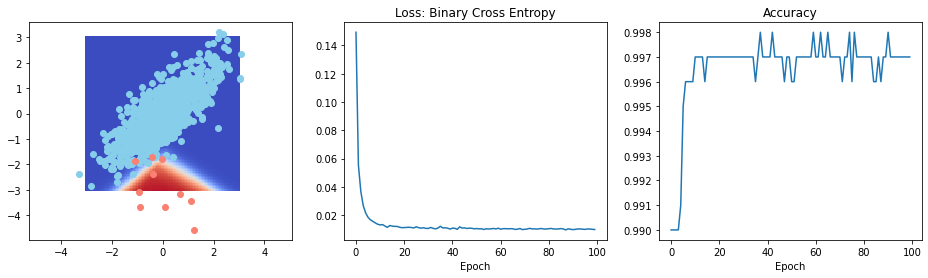

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

plot_surface(model=model, minimum=-3, maximun=3, resolution=100, ax=ax[0])
plot_points(x, y, ax=ax[0])
plot_loss(ax=ax[1])
plot_accuracy(ax=ax[2])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ccdb9771-ae37-4326-b040-1f894af2ffbd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>